In [1]:
import qiskit
import numpy as np

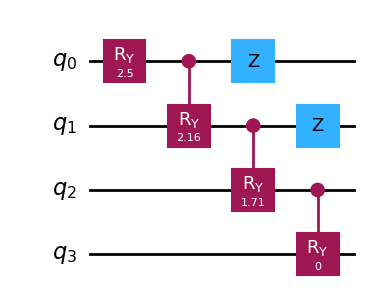

<IPython.core.display.Latex object>

In [65]:
def weighted_unary_encoding(num_bit: int, weights: list[float]) -> qiskit.QuantumCircuit:
    # assume that weights are normalized
    # TODO: check if weights are normalized

    if len(weights) - 1 > num_bit:
        raise ValueError("The length of weights must not exceed num_bit - 1.")

    betas = np.array([
        min(np.sqrt(weights[l]**2 / (1 - np.sum(weights[:l]**2))), 1)
        for l in range(len(weights))
    ])
    betas = 2 * np.arccos(betas)

    qc = qiskit.QuantumCircuit(num_bit)
    qc.ry(betas[0], 0)
    for i in range(1, num_bit):
        qc.cry(betas[i], i - 1, i)

    for i in range(1, len(weights)):
        if weights[i] * weights[i - 1] < 0:
            qc.z(i - 1)
    
    return qc

qc = weighted_unary_encoding(4, np.array([0.31622777, -0.4472136 , 0.54772256, 0.63245553]))
display(qc.draw('mpl'))
qiskit.quantum_info.Statevector(qc).draw('latex')

<IPython.core.display.Latex object>

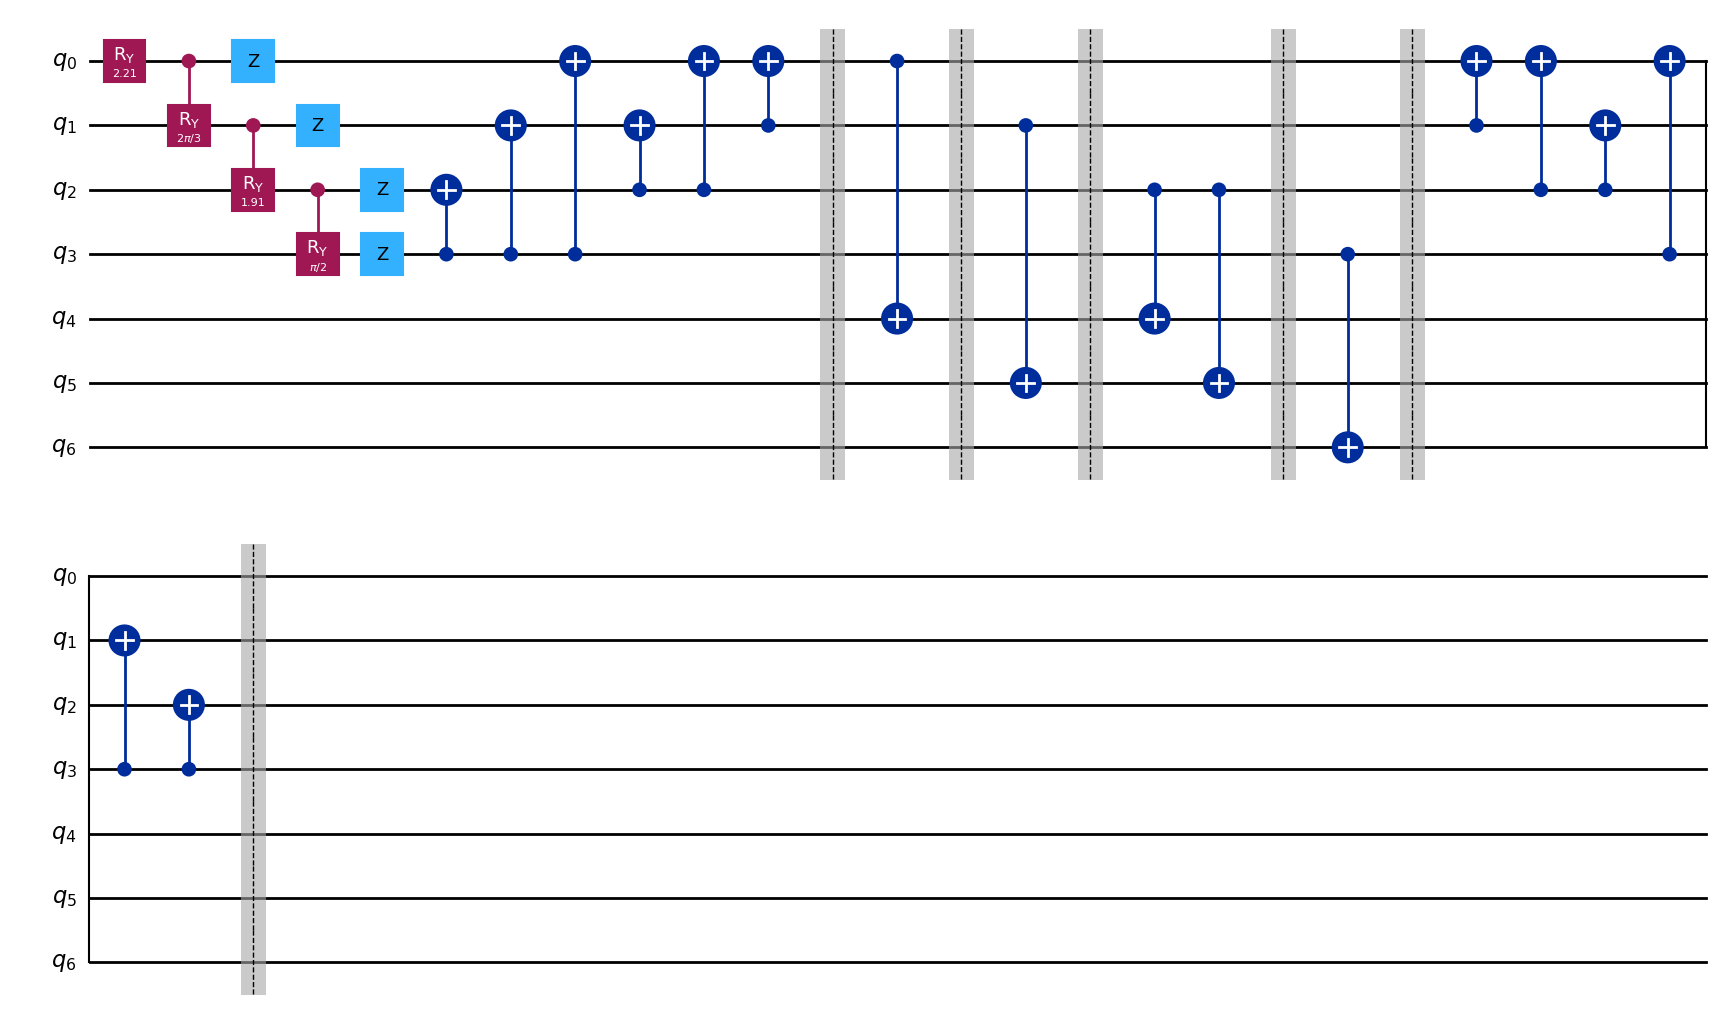

In [67]:
def unary_fanout_to_binary(num_bit: int) -> qiskit.QuantumCircuit:
    qc = qiskit.QuantumCircuit(num_bit + int(np.ceil(np.log2(num_bit)) + 1))
    for i in reversed(range(1, num_bit)):
        for j in reversed(range(i)):
            qc.cx(i, j)
    qc.barrier()
    for i in range(num_bit):
        n = i + 1
        for j, bitset in enumerate(reversed(f'{n:b}')):
            if bitset == '1':
                qc.cx(i, num_bit + j)
        qc.barrier()
    for i in range(1, num_bit):
        for j in range(i):
            qc.cx(i, j)
    qc.barrier()


    return qc

qc = qiskit.QuantumCircuit(4 + int(np.ceil(np.log2(4)) + 1))
# qc.compose(weighted_unary_encoding(4, np.array([0.31622777, 0.4472136 , 0.54772256, 0.63245553])), inplace=True)
qc.compose(weighted_unary_encoding(4, np.array([np.sqrt(1/5) * (-1) ** i for i in range(5)])), inplace=True)
qc.compose(unary_fanout_to_binary(4), inplace=True)
display(qiskit.quantum_info.Statevector(qc).draw('latex'))
qc.draw('mpl')

In [50]:
a = 3
f'{a:b}'

'11'